# Lab 9 - Deep Learning Model

This notebook includes automatic downloading and extraction of the SUSY dataset.

In [2]:

# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request
import gzip
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
%matplotlib inline


In [3]:

# Download and extract SUSY dataset if not already present
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz"
filename_gz = "SUSY.csv.gz"
filename_csv = "SUSY.csv"

# Check if the dataset needs to be downloaded and extracted
if not os.path.exists(filename_csv):
    if not os.path.exists(filename_gz):
        print("Downloading SUSY dataset...")
        urllib.request.urlretrieve(url, filename_gz)
        print("Download complete.")

    print("Extracting SUSY.csv from SUSY.csv.gz...")
    with gzip.open(filename_gz, 'rb') as f_in:
        with open(filename_csv, 'wb') as f_out:
            f_out.write(f_in.read())
    print("Extraction complete.")
else:
    print("Dataset already available as SUSY.csv.")


Download complete.
Extracting SUSY.csv from SUSY.csv.gz...
Extraction complete.


In [4]:

# Load dataset
filename = "SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel",
            "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

# Split data
N_Max = 550000
N_Train = 500000

Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:N_Max]

X_Train = np.array(Train_Sample[VarNames[1:]])
y_Train = np.array(Train_Sample["signal"])
X_Test = np.array(Test_Sample[VarNames[1:]])
y_Test = np.array(Test_Sample["signal"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7666 - loss: 0.4838 - val_accuracy: 0.7948 - val_loss: 0.4399
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7976 - loss: 0.4412 - val_accuracy: 0.7991 - val_loss: 0.4344
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7986 - loss: 0.4383 - val_accuracy: 0.8013 - val_loss: 0.4321
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7989 - loss: 0.4362 - val_accuracy: 0.7970 - val_loss: 0.4369
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7999 - loss: 0.4353 - val_accuracy: 0.8012 - val_loss: 0.4317
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7993 - loss: 0.4362 - val_accuracy: 0.8005 - val_loss: 0.4314
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8005 - loss: 0.4340 - val_accuracy: 0.8008 - val_loss: 0.4311
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7997 - loss:

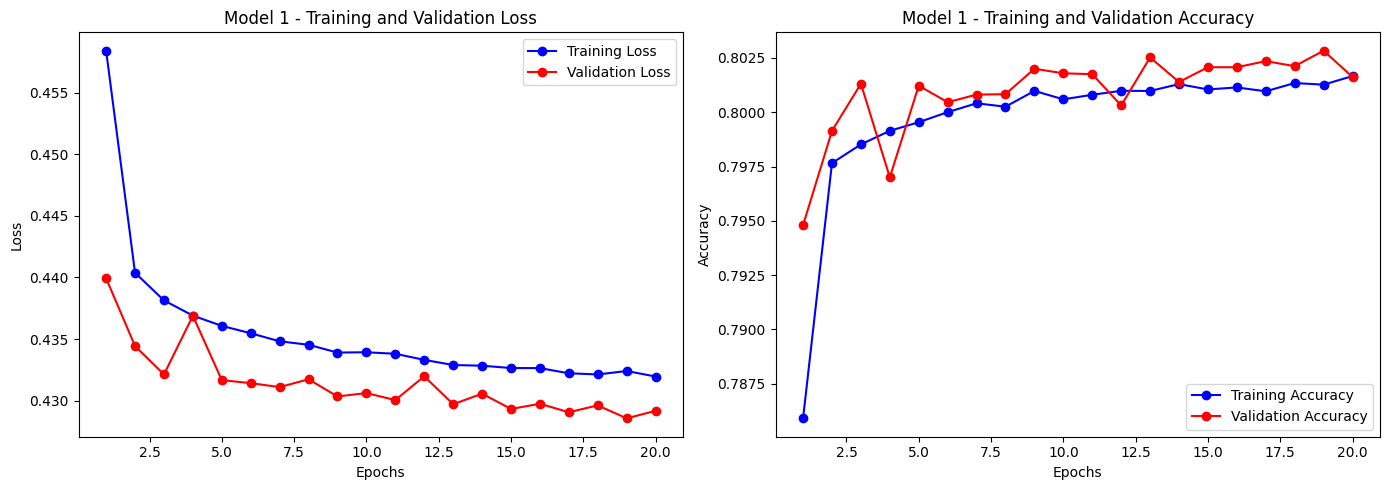

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Model 1 Test Accuracy: 0.8000

Model 1 does not show significant signs of overfitting.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7654 - loss: 0.4860 - val_accuracy: 0.7998 - val_loss: 0.4351
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7966 - loss: 0.4414 - val_accuracy: 0.8005 - val_loss: 0.4325
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.7979 - loss: 0.4387 - val_accuracy: 0.7993 - val_loss: 0.4327
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8006 - loss: 0.4340 - val_accuracy: 0.8012 - val_loss: 0.4307
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.8003 - loss: 0.4344 - val_accuracy: 0.8015 - val_loss: 0.4306
Epoch 6/20


KeyboardInterrupt: 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Load dataset (assuming SUSY.csv is in the same directory)
filename = "SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
            "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R",
            "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

# Split data into train and test sets
N_Max = 550000
N_Train = 500000

Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:N_Max]

X_Train = np.array(Train_Sample[VarNames[1:]])
y_Train = np.array(Train_Sample["signal"])
X_Test = np.array(Test_Sample[VarNames[1:]])
y_Test = np.array(Test_Sample["signal"])

# Function to plot training history
def plot_training_history(history, model_name="Model"):
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    accuracy = history.history.get('accuracy', [])
    val_accuracy = history.history.get('val_accuracy', [])

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label="Training Loss")
    plt.plot(epochs, val_loss, 'ro-', label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{model_name} - Training and Validation Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label="Training Accuracy")
    plt.plot(epochs, val_accuracy, 'ro-', label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"{model_name} - Training and Validation Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Define and train multiple models
models = []
histories = []

# Model configurations (varying layers, units, and dropout rates)
model_configs = [
    {"layers": [128, 64], "dropouts": [0.3, 0.2], "learning_rate": 0.001, "epochs": 20},
    {"layers": [256, 128, 64], "dropouts": [0.3, 0.2, 0.1], "learning_rate": 0.0005, "epochs": 20},
    {"layers": [64, 32, 16], "dropouts": [0.4, 0.3, 0.2], "learning_rate": 0.001, "epochs": 30}
]

# Loop through each configuration to create, train, and evaluate models
for idx, config in enumerate(model_configs):
    # Build the model
    model = Sequential()
    for i, units in enumerate(config["layers"]):
        if i == 0:
            model.add(Dense(units, activation='relu', input_dim=X_Train.shape[1]))
        else:
            model.add(Dense(units, activation='relu'))
        model.add(Dropout(config["dropouts"][i]))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=config["learning_rate"]),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model with Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_Train, y_Train, validation_split=0.2, epochs=config["epochs"],
                        batch_size=256, callbacks=[early_stopping], verbose=1)

    # Store the model and training history
    models.append(model)
    histories.append(history)

    # Plot the training history to answer questions
    plot_training_history(history, model_name=f"Model {idx + 1}")

    # Evaluate on test set
    y_pred = (model.predict(X_Test) > 0.5).astype("int32").flatten()
    test_accuracy = accuracy_score(y_Test, y_pred)
    print(f"Model {idx + 1} Test Accuracy: {test_accuracy:.4f}\n")

    # Check for overfitting: if training accuracy is significantly higher than validation accuracy
    train_accuracy = history.history['accuracy'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    if train_accuracy > val_accuracy + 0.05:
        print(f"Model {idx + 1} shows signs of overfitting.\n")
    else:
        print(f"Model {idx + 1} does not show significant signs of overfitting.\n")

# Summary
print("Training and evaluation of all models completed.")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


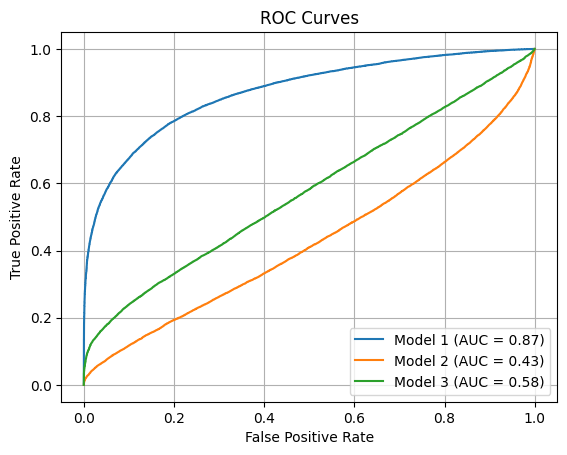

In [11]:

# Evaluate ROC and AUC
def compute_roc_auc(model, X, y):
    y_prob = model.predict(X).ravel()
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

for idx, model in enumerate(models):
    fpr, tpr, roc_auc = compute_roc_auc(model, X_Test, y_Test)
    plt.plot(fpr, tpr, label=f"Model {idx + 1} (AUC = {roc_auc:.2f})")

plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Load dataset (assuming SUSY.csv is in the same directory)
filename = "SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
            "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R",
            "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

# Split data into train and test sets
N_Max = 550000
N_Train = 500000

Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:N_Max]

X_Train = np.array(Train_Sample[VarNames[1:]])
y_Train = np.array(Train_Sample["signal"])
X_Test = np.array(Test_Sample[VarNames[1:]])
y_Test = np.array(Test_Sample["signal"])

# Plotting function
def plot_training_history(history, model_name="Model"):
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    accuracy = history.history.get('accuracy', [])
    val_accuracy = history.history.get('val_accuracy', [])

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label="Training Loss")
    plt.plot(epochs, val_loss, 'ro-', label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{model_name} - Training and Validation Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label="Training Accuracy")
    plt.plot(epochs, val_accuracy, 'ro-', label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"{model_name} - Training and Validation Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Define focal loss for Model 3
from tensorflow.keras import backend as K
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = K.cast(y_true, dtype='float32')
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        pt = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        return -K.mean(alpha * K.pow(1. - pt, gamma) * K.log(pt))
    return focal_loss_fixed

# Define and train the models

# Model 1: Simple DNN with Adam optimizer and binary cross-entropy loss
model_1 = Sequential([
    Dense(64, activation='relu', input_dim=X_Train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_Train, y_Train, validation_split=0.2, epochs=20, batch_size=256,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Model 2: Deeper DNN with SGD optimizer and mean squared error loss
model_2 = Sequential([
    Dense(128, activation='relu', input_dim=X_Train.shape[1]),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_2.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])
history_2 = model_2.fit(X_Train, y_Train, validation_split=0.2, epochs=20, batch_size=256,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Model 3: Complex DNN with RMSprop optimizer and focal loss
model_3 = Sequential([
    Dense(256, activation='relu', input_dim=X_Train.shape[1]),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_3.compile(optimizer=RMSprop(learning_rate=0.0005), loss=focal_loss(gamma=2., alpha=0.25), metrics=['accuracy'])
history_3 = model_3.fit(X_Train, y_Train, validation_split=0.2, epochs=20, batch_size=256,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Plot training history for each model
plot_training_history(history_1, model_name="Model 1")
plot_training_history(history_2, model_name="Model 2")
plot_training_history(history_3, model_name="Model 3")

# Evaluate models on test set and compare performance
for idx, (model, history) in enumerate(zip([model_1, model_2, model_3], [history_1, history_2, history_3]), 1):
    y_pred = (model.predict(X_Test) > 0.5).astype("int32").flatten()
    test_accuracy = accuracy_score(y_Test, y_pred)
    print(f"Model {idx} Test Accuracy: {test_accuracy:.4f}")
    print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}\n")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import numpy as np

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True)
}

# Define function to train and evaluate a classifier
def train_and_evaluate(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict probabilities for AUC calculation
    y_pred_proba = classifier.predict_proba(X_test)[:, 1] if hasattr(classifier, "predict_proba") else classifier.decision_function(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Print results
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc_score:.4f}")
    print(f"Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    return accuracy, auc_score, tp, fp

# Evaluate each classifier
results = {}
for name, clf in classifiers.items():
    print(f"\nEvaluating {name}...")
    accuracy, auc, tp, fp = train_and_evaluate(clf, X_Train, y_Train, X_Test, y_Test)
    results[name] = (accuracy, auc, tp, fp)

# Part C: Calculate maximal significance using the best classifier from Part B
# Select the classifier with the highest AUC
best_classifier_name = max(results, key=lambda k: results[k][1])
tp, fp = results[best_classifier_name][2], results[best_classifier_name][3]
Ns = tp
Nb = fp

# Maximal significance calculation
sigma_S = Ns / np.sqrt(Ns + Nb)
print(f"\nBest classifier: {best_classifier_name}")
print(f"Maximal Significance (σ_S): {sigma_S:.4f}")

# Compare with best DNN model from Exercise 3
print("\nEvaluating the best DNN model...")

# Assuming `model_3` from Exercise 3 is the best DNN model
y_pred_proba_dnn = model_3.predict(X_Test).flatten()
y_pred_dnn = (y_pred_proba_dnn > 0.5).astype(int)
accuracy_dnn = accuracy_score(y_Test, y_pred_dnn)
auc_dnn = roc_auc_score(y_Test, y_pred_proba_dnn)
tn_dnn, fp_dnn, fn_dnn, tp_dnn = confusion_matrix(y_Test, y_pred_dnn).ravel()

# Print DNN results
print(f"Best DNN Model Accuracy: {accuracy_dnn:.4f}")
print(f"Best DNN Model AUC: {auc_dnn:.4f}")
print(f"DNN Confusion Matrix: TN={tn_dnn}, FP={fp_dnn}, FN={fn_dnn}, TP={tp_dnn}")

# DNN Maximal significance calculation
Ns_dnn = tp_dnn
Nb_dnn = fp_dnn
sigma_S_dnn = Ns_dnn / np.sqrt(Ns_dnn + Nb_dnn)
print(f"DNN Maximal Significance (σ_S): {sigma_S_dnn:.4f}")
